# Boston Housing
The dataset presented in this project is taken from the <a href="https://www.kaggle.com/altavish/boston-housing-dataset">Boston Housing</a> dataset on Kaggle. The data contains 14 variables describing housing in the area of Boston Mass. The detail description of the abbreviations for each feature can be found <a href="">here on Delve (University of Toronto)</a>.

The goal for this project is to build a linear regressor that predicts NOX and another that predicts the median home value. The main challenge is having missing values in a small dataset.

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

---
## Data Understanding and Exploration

In [3]:
HOUSING_PATH = os.path.join("datasets", "midterm")

def load_housing_data(housing_path = HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "HousingData.csv") 
    return pd.read_csv(csv_path)

In [4]:
df = load_housing_data()

In [5]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Visual Representation of Numeric Features

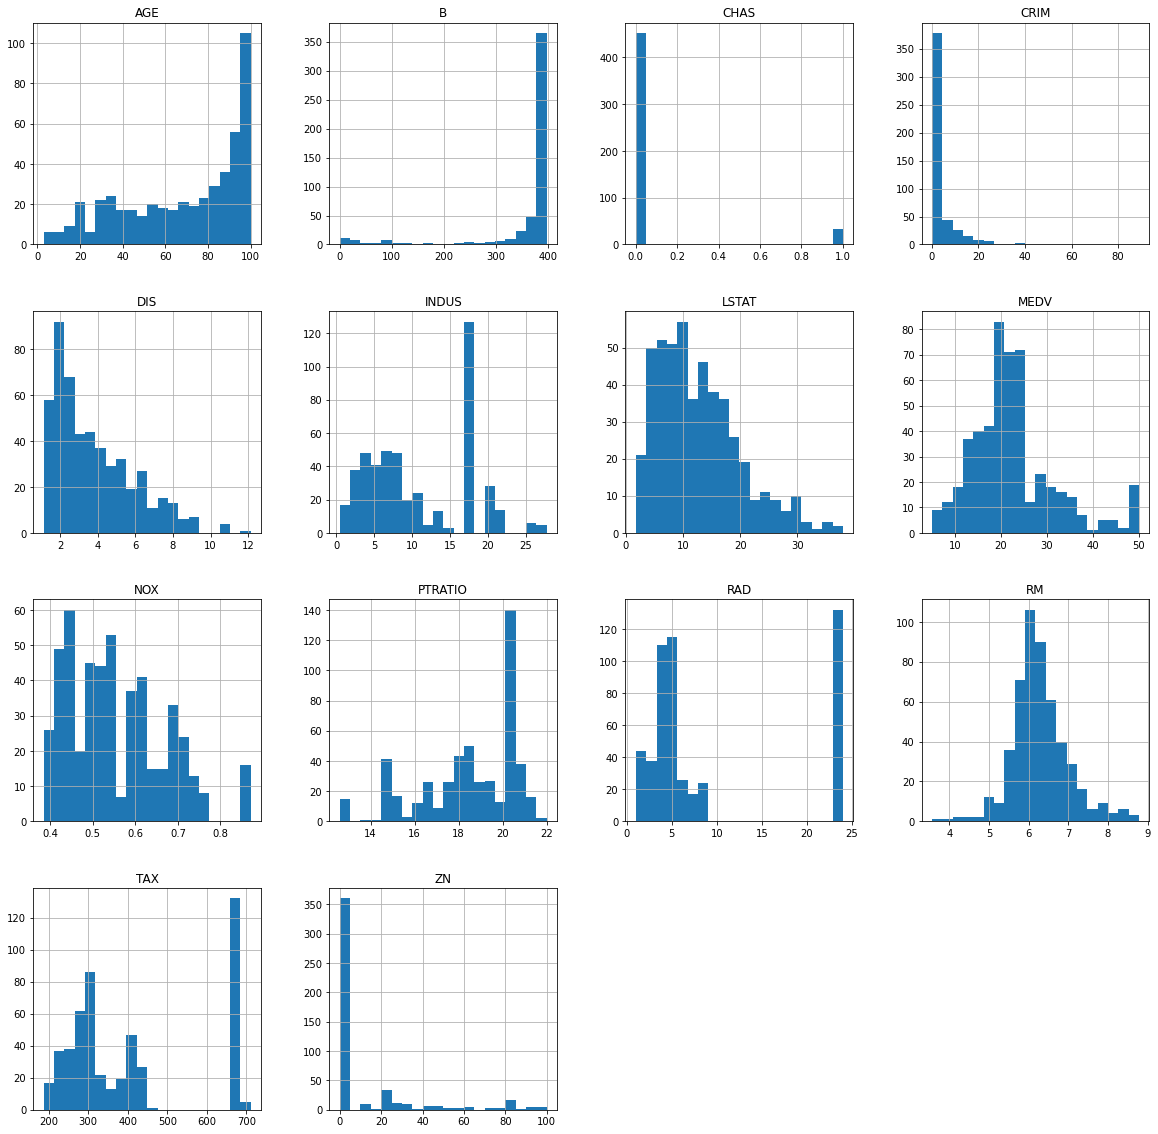

In [7]:
# Plot numeric features in histograms
df.hist(figsize=(20,20), grid=True, layout=(4,4), bins=20);

#### Features Correlation

In [8]:
corr = df.corr()

In [9]:
corr['NOX'].sort_values(ascending=False)

NOX        1.000000
INDUS      0.764866
AGE        0.731548
TAX        0.668023
RAD        0.611441
LSTAT      0.582641
CRIM       0.417130
PTRATIO    0.188933
CHAS       0.075097
RM        -0.302188
B         -0.380051
MEDV      -0.427321
ZN        -0.513704
DIS       -0.769230
Name: NOX, dtype: float64

In [10]:
corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

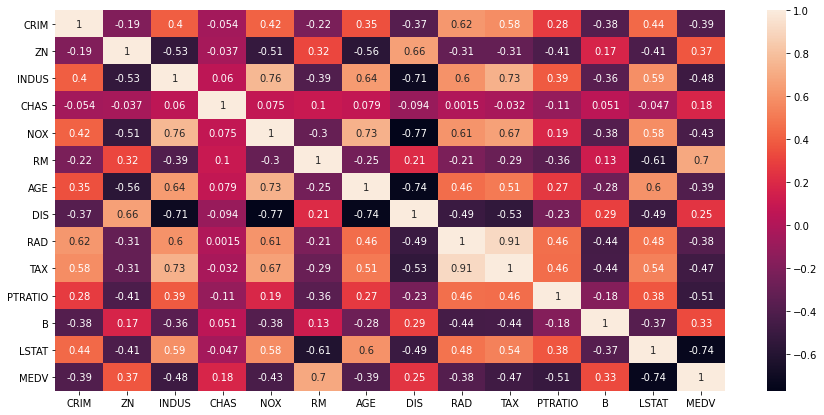

In [11]:
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True);

#### Check for Missing Values

In [12]:
null_count = df.isnull().sum()

In [13]:
data_tuples = list(zip(df.columns.values, null_count))
df_null = pd.DataFrame(data_tuples, 
                       columns=['Feature','Count of Missing Values']).sort_values(by=['Count of Missing Values'], 
                                                                                  ascending=False)
df_null

,Feature,Count of Missing Values
0,CRIM,20
1,ZN,20
2,INDUS,20
3,CHAS,20
6,AGE,20
12,LSTAT,20
4,NOX,0
5,RM,0
7,DIS,0
8,RAD,0


In [14]:
row_count = 506

null_percent = [X / row_count for X in null_count]

data_tuples = list(zip(df.columns.values, null_percent))
df_null_percent = pd.DataFrame(data_tuples, 
                               columns=['Feature','% of Missing Values']).sort_values(by=['% of Missing Values'], 
                                                                                          ascending=False)
df_null_percent

,Feature,% of Missing Values
0,CRIM,0.039526
1,ZN,0.039526
2,INDUS,0.039526
3,CHAS,0.039526
6,AGE,0.039526
12,LSTAT,0.039526
4,NOX,0.000000
5,RM,0.000000
7,DIS,0.000000
8,RAD,0.000000


6 of the 14 features have 20 missing values. By percentage, 3.95% of the data in these features are missing.

---
## Data Preprocessing
Since the dataset is very small -- with only 506 rows of data -- and the percentage is missing value is within the reasonable range, we should consider imputing missing values.

### Finding the Better Imputation Method
For this project, I will first use the SimpleImputer from Scikit-Learn. The strategies will be using the median and the mean for the missing values. To find the better imputation method, a simple linear regression model will be used for predicting the 'MEDV' feature and the results will be evaluated by the RMSE.

In [15]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")
mean_imputer = SimpleImputer(strategy="mean")

#### Median Imputer

In [16]:
df_imputated = df.copy()

In [17]:
df_imputated_median = median_imputer.fit_transform(df_imputated)
df_imputated = pd.DataFrame(df_imputated_median, columns = df_imputated.columns)

In [18]:
# Use MEDV as the target label and all else as learning input
X = df_imputated.drop(['MEDV'], axis=1)
y = df_imputated['MEDV']

# Split 80% of the data for training and leave out 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
median_lr = LinearRegression()
median_lr.fit(X_train, y_train);

In [20]:
y_train_pred = median_lr.predict(X_train)
y_test_pred = median_lr.predict(X_test)

In [21]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  4.728965486828851
Test RMSE:  4.999938478631844


#### Mean Imputer

In [22]:
df_imputated = df.copy()

In [23]:
df_imputated_mean = mean_imputer.fit_transform(df_imputated)
df_imputated = pd.DataFrame(df_imputated_mean, columns = df_imputated.columns)

In [24]:
# Use MEDV as the target label and all else as learning input
X = df_imputated.drop(['MEDV'], axis=1)
y = df_imputated['MEDV']

# Split 80% of the data for training and leave out 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
mean_lr = LinearRegression()
mean_lr.fit(X_train, y_train);

In [26]:
y_train_pred = mean_lr.predict(X_train)
y_test_pred = mean_lr.predict(X_test)

In [27]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  4.733997588960906
Test RMSE:  5.001766890194168


At this point, we can see that the SimpleImputer with median strategy has slightly better RMSE. However, the difference doesn't appear to be significant. I'm deciding to also try k-Nearest Neighbors imputer, which I found on the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute">documentation</a>.

#### kNN Imputer

In [28]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer()

In [29]:
df_imputated = df.copy()

In [30]:
df_imputated_knn = knn_imputer.fit_transform(df_imputated)
df_imputated = pd.DataFrame(df_imputated_knn, columns = df_imputated.columns)

In [31]:
# Use MEDV as the target label and all else as learning input
X = df_imputated.drop(['MEDV'], axis=1)
y = df_imputated['MEDV']

# Split 80% of the data for training and leave out 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
knn_lr = LinearRegression()
knn_lr.fit(X_train, y_train);

In [33]:
y_train_pred = knn_lr.predict(X_train)
y_test_pred = knn_lr.predict(X_test)

In [34]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  4.663850919557943
Test RMSE:  4.940344284973902


We can see that the k-Nearest Neighbors imputer are doing slightly better than both versions of the SimpleImputer above. Thus, I'll use it to fix missing values in the dataset.

### Imputation with kNN

In [35]:
df_knn = knn_imputer.fit_transform(df)
df = pd.DataFrame(df_knn, columns = df.columns)

---
## Training the Models (for NOX)

In [36]:
# Use NOX as the target label and all else as learning input
X = df.drop(['NOX'], axis=1)
y = df['NOX']

# Split 80% of the data for training and leave out 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train);

In [38]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [39]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  0.054940908052698335
Test RMSE:  0.05332196864894644


In [40]:
r2_score(y_test, y_test_pred)

0.7565481789565764

### Ridge Regression

In [41]:
from sklearn.linear_model import Ridge

ri = Ridge()
# ri.fit(X_train, y_train);

alphas_to_try = [{
    'alpha': [(lambda x: 10 ** x)(x) for x in range(-5, 5)]
}]
# Use grid search to find the best combination of hyperparameters on the given dataset
grid_search = GridSearchCV(ri, alphas_to_try, cv=5)
grid_search.fit(X_train, y_train);

In [42]:
grid_search.best_estimator_

Ridge(alpha=100)

In [43]:
best_ri = grid_search.best_estimator_

In [44]:
y_train_pred = best_ri.predict(X_train)
y_test_pred = best_ri.predict(X_test)

In [45]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  0.05517829924526434
Test RMSE:  0.052733548514068675


In [46]:
r2_score(y_test, y_test_pred)

0.761891625491992

### Lasso Regression
Lasso regression model is a linear regression model trained with L1 prior as regularizer.

In [47]:
from sklearn.linear_model import Lasso

ls = Lasso()
# ls.fit(X_train, y_train);

alphas_to_try = [{
    'alpha': [(lambda x: 10 ** x)(x) for x in range(-5, 5)]
}]
# Use grid search to find the best combination of hyperparameters on the given dataset
grid_search = GridSearchCV(ls, alphas_to_try, cv=5)
grid_search.fit(X_train, y_train);

In [48]:
grid_search.best_estimator_

Lasso(alpha=0.001)

In [49]:
best_ls = grid_search.best_estimator_

In [50]:
y_train_pred = best_ls.predict(X_train)
y_test_pred = best_ls.predict(X_test)

In [51]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  0.055116267513288665
Test RMSE:  0.052413557606084134


In [52]:
r2_score(y_test, y_test_pred)

0.7647725749561908

#### Brief Conclusion
All 3 linear regression models turn out to have reletively low RMSE on both the training and testing set.

The Lasso Regression model has a better performance than the simple Linear and Ridge Regression models, with a slightly higher R-squared score. Thus, it's the best predictor of the 3 evaluted models here for the 'NOX' feature, followed by Ridge and lastly by the simple Linear Regression.

---
## Training the Models (for MEDV)

In [53]:
# Use MEDV as the target label and all else as learning input
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

# Split 80% of the data for training and leave out 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [54]:
lr.fit(X_train, y_train);

In [55]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [56]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  4.663850919557943
Test RMSE:  4.940344284973902


In [57]:
r2_score(y_test, y_test_pred)

0.6671792916954046

### Ridge Regression

In [58]:
ri = Ridge()
# ri.fit(X_train, y_train);

alphas_to_try = [{
    'alpha': [(lambda x: 10 ** x)(x) for x in range(0, 5)]
}]
# Use grid search to find the best combination of hyperparameters on the given dataset
grid_search = GridSearchCV(ri, alphas_to_try, cv=5)
grid_search.fit(X_train, y_train);

In [59]:
grid_search.best_estimator_

Ridge(alpha=1)

In [60]:
best_ri = grid_search.best_estimator_

In [61]:
y_train_pred = best_ri.predict(X_train)
y_test_pred = best_ri.predict(X_test)

In [62]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  4.681891760095156
Test RMSE:  4.9602348076843565


In [63]:
r2_score(y_test, y_test_pred)

0.6644939305316604

### Lasso Regression

In [64]:
ls = Lasso()
# ls.fit(X_train, y_train);

alphas_to_try = [{
    'alpha': [(lambda x: 10 ** x)(x) for x in range(0, 5)]
}]
# Use grid search to find the best combination of hyperparameters on the given dataset
grid_search = GridSearchCV(ls, alphas_to_try, cv=5)
grid_search.fit(X_train, y_train);

In [65]:
grid_search.best_estimator_

Lasso(alpha=1)

In [66]:
best_ls = grid_search.best_estimator_

In [67]:
y_train_pred = best_ls.predict(X_train)
y_test_pred = best_ls.predict(X_test)

In [68]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  5.149232551378636
Test RMSE:  4.913264202320305


In [69]:
r2_score(y_test, y_test_pred)

0.6708179493613913

#### Brief Conclusion
All 3 linear regression models turn out to have reletively low RMSE. The simple Linear and Ridge Regression models have lower RMSE on the training set than on the testing set, meaning that these 2 fit slightly better to the training set than on the testing set.

The Lasso Regression model, again, has a better performance than the simple Linear and Ridge Regression model, with a slightly higher R-squared score. Thus, it's the best predictor of the 3 evaluted models here for the 'MEDV' feature.